# Avance series temporales

Para poder empezar a tratar datos temporales, a continuación haremos una muy breve explicación. Sin embargo, se desarrollará con detalle en un par de semanas.

Básicamente, veremos 2 aspectos básicos:
  - Librería ``datetime``
  - Rangos de fechas en Pandas
  
  
## Librería datetime

Esta librería la utilizaremos tanto para crear fechas como para convertir de un formato a otro. Si quieres profundizar, te dejo la [documentación](https://docs.python.org/3/library/datetime.html#:~:text=Python%20%C2%BB%203.9.0%20Documentation%20%C2%BB%20...%20The%20datetime,output%20formatting%20and%20manipulation.%20See%20also.%20Module%20calendar)

### Creando fechas:

Sintaxis:

```Python
datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0)
```

Por ejemplo, para crearnos la fecha correspondiente al 20 de enero de 2018:

In [86]:
from datetime import datetime
fecha = datetime(year=2018, month=1, day=20)
fecha

datetime.datetime(2018, 1, 20, 0, 0)

Con esto podemos obtener diferentes características de l propia fecha, tales como año (year), mes (month), día (day) o, en caso de que sea una fecha con detalle temporal, horas (hour), minutos (minute)...

In [87]:
fecha.year

2018

### Convirtiendo formatos:

Muchas veces estudiaremos datos con fechas pero que serán interpretados como cadenas de texto, por lo que tendremos que convertirlos en fechas. Para ello, esta librería nos puede ayudar gracias a 2 métodos:

  - Conversión string -> datetime:
  ```Python
  datetime.strptime(string_fecha)
   ```
   
   
  - Conversión datetime -> string:
  ```Python
  fecha_datetime.strftime(formato)
   ```
   
Para comprobar qué formatos podemos usar, aquí tenemos una [tabla](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)
  

In [91]:
fecha_string = '2020/10/14'
fecha_datetime = datetime.strptime(fecha_string, '%Y/%m/%d')
fecha_datetime

datetime.datetime(2020, 10, 14, 0, 0)

In [97]:
fecha_string_2 = fecha.strftime("%Y-%m-%d")
fecha_string_2

'2018-01-20'

## Rangos de fechas con Pandas

Esta librería la utilizaremos tanto para crear fechas como para convertir de un formato a otro. Si quieres profundizar, te dejo la [documentación](https://docs.python.org/3/library/datetime.html#:~:text=Python%20%C2%BB%203.9.0%20Documentation%20%C2%BB%20...%20The%20datetime,output%20formatting%20and%20manipulation.%20See%20also.%20Module%20calendar)

### Creando fechas:

Con la función ``date_range()`` podemos crear rangos de fechas, tal como indica su [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html?highlight=date_range#pandas.date_range), a la que podremos invocar de la siguiente manera:

```Python
pd.date_range(start, end, periods)
```

Por ejemplo, para crearnos las fechas desde el 20 de enero de 2018 al 18 de junio de 2019:

In [100]:
import pandas as pd

fechas = pd.date_range(start='2018-01-20', end='2019-06-18')
fechas

DatetimeIndex(['2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27',
               '2018-01-28', '2018-01-29',
               ...
               '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16',
               '2019-06-17', '2019-06-18'],
              dtype='datetime64[ns]', length=515, freq='D')

In [105]:
fechas_mensual = pd.date_range(start='2018-01-20', end='2019-06-18', freq='M')
fechas_mensual

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [106]:
print(fechas.dtype)
print(fechas_mensual.dtype)

datetime64[ns]
datetime64[ns]


### Convirtiendo rangos:

Con la función ``pd.to_datetime()`` podemos convertir campos de un dataframe en fechas, lo cual inferirá automáticamente Pandas.

Veamos un ejemplo con un dataset:

In [118]:
import pandas as pd

df = pd.read_csv("datos_ejemplo.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900


In [119]:
df['Date'].dtype

dtype('O')

In [121]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2513   2019-12-27
2514   2019-12-30
2515   2019-12-31
2516   2020-01-02
2517   2020-01-03
Name: Date, Length: 2518, dtype: datetime64[ns]

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np

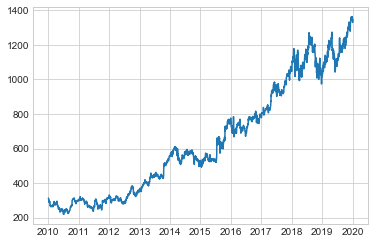

In [123]:
plt.plot(df['Date'], df['Open'])

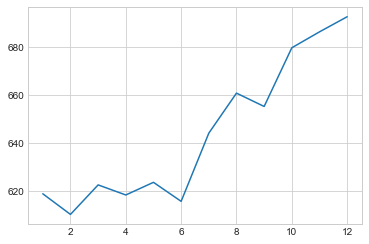

In [124]:
# Podemos acceder a los atributos del Date mediante "dt":
df2 = df.groupby(df['Date'].dt.month).mean()

plt.plot(df2.index, df2['Open'])

## Extra

Como veremos cuando estudiemos este apartado con mayor detalle, el tratamiento de datos temporales es un aspecto bastante amplio. Un muy buen recurso para aprender sobre las características de las series temporales proporcionadas por Pandas es la propia [documentación de Pandas](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)
